## Taller Regularización y SVM


Para esta tarea consideramos un conjunto de observaciones sobre una serie de variedades de vino tinto y blanco que implican sus propiedades químicas y su clasificación por parte de los catadores. La industria del vino ha experimentado un gran crecimiento en los últimos tiempos debido al aumento del consumo social. El precio del vino depende de un concepto bastante abstracto de apreciación del vino por parte de los catadores, cuya opinión puede tener un alto grado de variabilidad. El precio del vino depende en cierta medida de este factor tan volátil. Otro factor clave en la certificación y evaluación de la calidad del vino son las pruebas fisicoquímicas, que se realizan en laboratorio y tienen en cuenta factores como la acidez, el nivel de pH, la presencia de azúcar y otras propiedades químicas. Para el mercado del vino, sería interesante que la calidad humana de la cata pudiera relacionarse con las propiedades químicas del vino para que el proceso de certificación y evaluación de la calidad estuviera más controlado.

Se dispone de dos conjuntos de datos, uno de los cuales se refiere al vino tinto y cuenta con 1.599 variedades diferentes, y el otro, al vino blanco, con 4.898 variedades. Todos los vinos se producen en una zona concreta de Portugal. Se recogen datos sobre 12 propiedades diferentes de los vinos, una de las cuales es la calidad, basada en datos sensoriales, y el resto son propiedades químicas de los vinos, como la densidad, la acidez, el contenido de alcohol, etc. Todas las propiedades químicas de los vinos son variables continuas. La calidad es una variable ordinal con una clasificación posible de 1 (peor) a 10 (mejor). Cada variedad de vino es catada por tres catadores independientes y la clasificación final asignada es la mediana de la clasificación dada por los catadores.

Se espera que un modelo predictivo desarrollado a partir de estos datos sirva de orientación a los viñedos en cuanto a la calidad y el precio que se espera obtener de sus productos sin depender en gran medida de la volatilidad de los catadores.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [3]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [4]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
data.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


# Ejercicio 1

Mostrar la tabla de frecuencias de la calidad por tipo de vino.

In [7]:
pd.crosstab(index=data.type,
            columns=data.quality, margins=True)

quality,3,4,5,6,7,8,9,All
type,,,,,,,,
red,10,53,681,638,199,18,0,1599
white,20,163,1457,2198,880,175,5,4898
All,30,216,2138,2836,1079,193,5,6497


# Regularización

# Ejercicio 2

* Entrenar una regresión lineal para predecir la calidad del vino (Continuo)

* Analice los coeficientes

* Evaluar el RMSE

In [8]:
data['type'] = data['type'].map({"white":0, "red":1})

In [9]:
data.shape

(6497, 13)

In [10]:
# define X and y
X = data.drop('quality', axis=1)
y = data['quality']

In [11]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# examine the coefficients
coefl = linreg.coef_
print(coefl)


[ 9.76223931e-02 -1.55047309e+00 -1.36418739e-01  6.67473085e-02
 -7.67939579e-01  3.99814849e-03 -1.05686554e-03 -1.13045446e+02
  5.15890499e-01  7.01081951e-01  2.09971675e-01  4.24352933e-01]


In [14]:
float(-1.13045446e+02)

-113.045446

En primer lugar, los coeficientes del modelo lineal normal, parecen no ser tan grandes a excepción del coeficiente $ 8 = -113.045446$

In [15]:
# make predictions
y_pred = linreg.predict(X_test)

In [16]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print("RMSE Modelo Lineal Normal: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE Modelo Lineal Normal:  0.7176907067288503


Para el Modelo Lineal Normal el **RMSE es igual a 0.717690**

# Ejercicio 3

* Estimar una regresión de Ridge con alfa igual a 0,1 y 1.
* Compare y analice los coeficientes de Ridge con la regresión lineal
* Evaluar el RMSE

**Para Alpha = 0.1**

In [17]:
# alpha=0.1
from sklearn.linear_model import Ridge
ridgereg0 = Ridge(alpha=0.1, normalize=True)
ridgereg0.fit(X_train, y_train)
y_pred = ridgereg0.predict(X_test)
print('Regresión Ridge (alpha0.1) RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regresión Ridge (alpha0.1) RMSE :  0.719979841979972


In [18]:
coef = ridgereg0.coef_ 
print(ridgereg0.coef_)

[ 2.88566714e-02 -1.28227049e+00 -2.39357437e-02  2.97639425e-02
 -1.18663870e+00  3.80364255e-03 -1.28915306e-03 -3.82373057e+01
  2.08500233e-01  5.91549553e-01  2.50777308e-01  1.56871332e-01]


In [19]:
float(-3.82373057e+01)

-38.2373057

In [20]:
(-38.2373057-(-113.045446))/-113.045446*100

-66.1752798958394

+ El **8vo coeficiente** disminuyo un 66% con un alpha = 0.1 

**Para Alpha = 1**

In [21]:
# alpha = 1
from sklearn.linear_model import Ridge
ridgereg1 = Ridge(alpha=1, normalize=True)
ridgereg1.fit(X_train, y_train)
y_pred = ridgereg1.predict(X_test)
print('Regresión Ridge (alpha1) RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regresión Ridge (alpha1) RMSE :  0.7607146212084613


In [22]:
coef1 = ridgereg1.coef_ 
print(ridgereg1.coef_)

[ 1.59777628e-03 -5.85134501e-01  1.48863414e-01  5.68749607e-03
 -1.27422144e+00  1.29552381e-03 -5.83083646e-04 -2.22851534e+01
  8.29715054e-02  3.00782372e-01  1.36293748e-01 -4.29621834e-03]


In [23]:
float(-2.22851534e+01)

-22.2851534

In [24]:
(-22.2851534-(-113.045446))/-113.045446*100

-80.28655360429114

+ El **8vo coeficiente** disminuyo un 80% con un alpha = 1

**Comparación coeficientes Alpha = 0.1 vs Alpha = 1**

In [25]:
print(coef1 - coef)

[-2.72588951e-02  6.97135991e-01  1.72799157e-01 -2.40764464e-02
 -8.75827443e-02 -2.50811874e-03  7.06069418e-04  1.59521523e+01
 -1.25528727e-01 -2.90767181e-01 -1.14483560e-01 -1.61167550e-01]


+ En terminos generales, se puede apreciar que los coeficientes de la Regresión Ridge con alpha = 0.1 son mayores que los coeficientes con alpha = 1. Esto se explica porque en cuanto menor sea el alpha menos van a estar restringidos los coeficientes, por ende podrán ser mas grandes. En el caso de alpha = 1 los coeficientes son más pequeños ya que con un alpha mayor, habrá mayor restricción.

**Alpha = 0.1 vs Modelo lineal normal**

In [26]:
print(coef - coefl)

[-6.87657217e-02  2.68202599e-01  1.12482995e-01 -3.69833660e-02
 -4.18699120e-01 -1.94505938e-04 -2.32287526e-04  7.48081402e+01
 -3.07390266e-01 -1.09532398e-01  4.08056331e-02 -2.67481601e-01]


**Alpha = 1 vs Modelo lineal normal**

In [27]:
print(coef1 - coefl)

[-9.60246168e-02  9.65338590e-01  2.85282153e-01 -6.10598125e-02
 -5.06281865e-01 -2.70262468e-03  4.73781892e-04  9.07602925e+01
 -4.32918993e-01 -4.00299579e-01 -7.36779270e-02 -4.28649151e-01]


  
+ Los coeficientes del Modelo Lineal Normal son mucho más grandes que los de los otros dos modelos, sin embargo el Modelo Lineal Normal es el que menor RMSE tiene, por lo que se puede pensar que esos alphas escogidos no son los óptimos, el siguiente paso sera evaluar con la función RidgeCV el alpha recomendado que minimise el RMSE.

**RMSE**

| RMSE | Valor |
|------|-------|
| Modelo Lineal Normal|  0.71769 |
| Regresión Ridge \*alpha=0.1* |  0.71998 |
|Regresión Ridge \*alpha=1* |  0.76071 |

In [28]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [29]:
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [30]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print('Regresión Ridge (alpha0.01) RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regresión Ridge (alpha0.01) RMSE :  0.7171904221904546


+ Luego de variar los alphas, el alpha recomendado para hacer el modelo más optimo es de **0.01**, el cual tiene el valor más pequeño de **RMSE = 0.71719**

# Ejercicio 4

* Estimar una regresión lasso con alfa igual a 0,01, 0,1 y 1.
* Comparar los coeficientes con la regresión lineal
* Evaluar el RMSE

**Para Alpha = 0.01**

In [31]:
# alpha=0.01 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg0 = Lasso(alpha=0.01, normalize=True)
lassoreg0.fit(X_train, y_train)
print(lassoreg0.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0.]


In [32]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg0.predict(X_test)
print('Regresión Lasso Alpha0.01 RMSE = ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regresión Lasso Alpha0.01 RMSE =  0.8709345888926285


**Para Alpha = 0.1**

In [33]:
# alpha=0.1 and examine coefficients
lassoreg1 = Lasso(alpha=0.1, normalize=True)
lassoreg1.fit(X_train, y_train)
print(lassoreg1.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0.]


In [34]:
# calculate RMSE (for alpha=0.1)
y1_pred = lassoreg1.predict(X_test)
print('Regresión Lasso Alpha0.1 RMSE = ',np.sqrt(metrics.mean_squared_error(y_test, y1_pred)))

Regresión Lasso Alpha0.1 RMSE =  0.8709345888926285


**Para Alpha = 1**

In [35]:
# alpha = 1 and examine coefficients
lassoreg2 = Lasso(alpha=1, normalize=True)
lassoreg2.fit(X_train, y_train)
print(lassoreg2.coef_)

[-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0.]


In [36]:
# calculate RMSE (for alpha=1)
y2_pred = lassoreg2.predict(X_test)
print('Regresión Lasso Alpha1 RMSE = ',np.sqrt(metrics.mean_squared_error(y_test, y2_pred)))

Regresión Lasso Alpha1 RMSE =  0.8709345888926285


+ Curiosamente, vemos que para los **alphas 0.01 , 0.1 y 1** elimina todas las variables, se evaluara con el alpha que recomienda la función LassoCV

In [37]:
# select the best alpha with LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1,cv=5)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

1.176870783767727e-05

+ Según la función LassoCV un **alpha = 0.0000117** sera el optimo para el modelo 

In [38]:
# examine the coefficients
coefLa = lassoregcv.coef_
print(lassoregcv.coef_)

[ 8.62872080e-02 -1.54205318e+00 -1.25805531e-01  6.18553642e-02
 -7.72024633e-01  3.93054071e-03 -1.05539086e-03 -1.01504094e+02
  4.63521286e-01  6.81397847e-01  2.21386081e-01  3.97255948e-01]


+ Se puede apreciar que con este alpha, al ser muy pequeño, no hubo demasiada restricción para los coeficientes por lo que aun se pueden ver relativamente grandes  

**Comparación con el Modelo Lineal Normal**

In [39]:
print(coefLa - coefl)

[-1.13351851e-02  8.41991097e-03  1.06132078e-02 -4.89194437e-03
 -4.08505412e-03 -6.76077783e-05  1.47467596e-06  1.15413521e+01
 -5.23692122e-02 -1.96841035e-02  1.14144061e-02 -2.70969846e-02]


In [40]:
print((coefLa - coefl)/coefl*100)

[-11.61125511  -0.54305431  -7.77987535  -7.32905113   0.53194994
  -1.69097717  -0.13953298 -10.20947994 -10.15122635  -2.80767511
   5.43616471  -6.38548304]


In [41]:
print(np.mean((coefLa - coefl)/coefl*100))

-4.389957987279057


+ En terminos generales, los coeficientes de la regresión lineal normal son más grandes que los de la Regresión Lasso, al hacer una restriccion en los coeficientes tan pequeña la diferencia no fue mucha, en promedio los coeficientes disminuyeron un 4.38% 

In [42]:
# predict method uses the best alpha value
yb_pred = lassoregcv.predict(X_test)
print('Regresión Lasso Alpha0.0000117 RSME',np.sqrt(metrics.mean_squared_error(y_test, yb_pred)))

Regresión Lasso Alpha0.0000117 RSME 0.7174686065761037


+ A pesar que la restricción fue muy pequeña, en terminos de RMSE comparado con el Modelo lineal normal, la Regresión Lasso es el modelo más óptimo.

Luego de evaluar **La Regresión Normal, La Regresión Ridge y La Regresión Lasso con los alphas recomendados** y siendo muy muy estrictos, se concluye que el mejor modelo en terminos de RMSE es la Regresión Ridge con alpha = 0.01

| RMSE | Valor |
|------|-------|
| Modelo Lineal Normal|  0.71769 |
| Regresión Ridge \*alpha=0.01* |  0.71719 |
|Regresión Lasso \*alpha=0.0000117* |  0.71747 |

# Ejercicio 5

* Estandarizar las características (excepto la calidad del vino)

* Crear una variable objetivo binaria para cada tipo de vino

* Analizar los coeficientes

* * Evalúe con F1, AUC-ROC y log-loss

**Estandarización**

In [43]:
data_ = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [44]:
from sklearn.preprocessing import StandardScaler

data_z = StandardScaler().fit_transform(data_)
data_z = pd.DataFrame(data_z)
data_z.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [45]:
data_z[['quality','type']] = data[['quality','type']]

In [46]:
data_z.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,6,0
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,6,0
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,6,0
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6,0
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6,0



      White = 0 
      Red = 1 

In [47]:
data_z.type.value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [48]:
# define X and y
X = data_z.drop('type', axis=1)
y = data_z['type']

In [49]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
# build a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9,solver='liblinear',multi_class='auto')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
# examine the coefficients
print(logreg.coef_)

[[-0.57611671  1.20995764 -0.42883615 -5.63028398  0.77613649  1.00875515
  -3.01514254  5.56776824 -0.28581893  0.48374325  2.03406831  0.51525207]]


In [52]:
y_pred = logreg.predict(X_test)

In [53]:
# calculate log loss
print('Log Loss', metrics.log_loss(y_test, y_pred))

Log Loss 0.2975663189667949


In [54]:
print('F1 score:', metrics.f1_score(y_test, y_pred))

F1 score: 0.9819587628865979


In [55]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score:', metrics.roc_auc_score(y_test, y_pred, average=None))

ROC AUC score: 0.9847528427429367


# Ejercicio 6

* Estimar una regresión logística regularizada usando:
* C = 0.01, 0.1 & 1.0
* penalización = ['l1, 'l2']
* Compare los coeficientes y la puntuación f1.

Nota: Para los valores de C y Penalización, deben realizar todas las posibles combinaciones entre estas dos variables.

**Primer Caso**

    C = 0.01
    Penalización = L1
  

In [56]:
# try C=0.01 with L1 penalty
logreg0 = LogisticRegression(C=0.01, penalty='l1',solver='liblinear',multi_class='auto')
logreg0.fit(X_train, y_train)
print(logreg0.coef_)

[[ 0.32446429  0.83193371  0.          0.          0.44327813  0.
  -1.73648971  0.37520029  0.33641306  0.58870556  0.         -0.36669971]]


+ Podemos ver que por regresión logística regularizada por Lasso y un alpha = 0.01, elimina alrrededor de 4 coeficientes que quizas no son importantes, y a los demás los pasa a una escala menor.

In [57]:
y_pred0 = logreg0.predict(X_test)
print('F1 score:', metrics.f1_score(y_test, y_pred0))
print('AUC:', roc_auc_score(y_test, y_pred0))
print('Log Loss', metrics.log_loss(y_test, y_pred0))

F1 score: 0.9679897567221512
AUC: 0.9776821920982506
Log Loss 0.531371203350462


**Segundo Caso**

    C = 0.01
    Penalización = L2
  

In [58]:
# try C=0.01 with L2 penalty
logreg1 = LogisticRegression(C=0.01, penalty='l2',solver='liblinear',multi_class='auto')
logreg1.fit(X_train, y_train)
print(logreg1.coef_)

[[ 0.58925175  0.73870086 -0.22262597 -0.5422265   0.60961548 -0.21553374
  -1.15555245  0.69510279  0.52982034  0.63166171  0.16181576 -0.3688043 ]]


+ Podemos ver que por regresión logística regularizada por Ridge y un alpha = 0.01, no elimina ningún coeficiente, solo los pasa a una escala menor.

In [59]:
y_pred1 = logreg1.predict(X_test)
print('F1 score:', metrics.f1_score(y_test, y_pred1))
print('AUC:', roc_auc_score(y_test, y_pred1))
print('Log Loss', metrics.log_loss(y_test, y_pred1))

F1 score: 0.9783989834815755
AUC: 0.9870162785308771
Log Loss 0.36133365826940617


**Tercer Caso**

    C = 0.1
    Penalización = L1
  

In [60]:
# try C=0.1 with L2 penalty
logreg3 = LogisticRegression(C=0.1, penalty='l1',solver='liblinear',multi_class='auto')
logreg3.fit(X_train, y_train)
print(logreg3.coef_)

[[ 0.00891345  0.93157259 -0.14702459 -1.97413877  0.64655546  0.28033153
  -2.41778746  2.74860658  0.30220565  0.73790458  0.87853537 -0.57442494]]


+ Podemos ver que por regresión logística regularizada por Lasso y con un alpha = 0.1, no elimina ningún coeficiente, con este alpha todos los coeficientes mantienen su importancia

In [61]:
y_pred3 = logreg3.predict(X_test)
print('F1 score:', metrics.f1_score(y_test, y_pred3))
print('AUC:', roc_auc_score(y_test, y_pred3))
print('Log Loss', metrics.log_loss(y_test, y_pred3))

F1 score: 0.9872448979591837
AUC: 0.9915948739593162
Log Loss 0.21254877657615964


**Cuarto Caso**

    C = 0.1
    Penalización = L2
  

In [62]:
# try C=0.1 with L2 penalty
logreg4 = LogisticRegression(C=0.1, penalty='l2',solver='liblinear',multi_class='auto')
logreg4.fit(X_train, y_train)
print(logreg4.coef_)

[[ 0.75072999  1.00835372 -0.33729871 -1.33147544  0.84426537  0.22533246
  -2.16361362  1.60588834  0.69457914  0.83959543  0.52127802 -0.44833835]]


+ Podemos ver que por regresión logística regularizada por Ridge y un alpha = 0.1, no elimina ningún coeficiente, solo los pasa a una escala menor.

In [63]:
y_pred4 = logreg4.predict(X_test)
print('F1 score:', metrics.f1_score(y_test, y_pred4))
print('AUC:', roc_auc_score(y_test, y_pred4))
print('Log Loss', metrics.log_loss(y_test, y_pred4))

F1 score: 0.9859872611464968
AUC: 0.991189358955261
Log Loss 0.23380390026375397


**Quinto Caso**

    C = 1
    Penalización = L1
  

In [64]:
# try C=1 with L2 penalty
logreg5 = LogisticRegression(C=1, penalty='l1',solver='liblinear',multi_class='auto')
logreg5.fit(X_train, y_train)
print(logreg5.coef_)

[[-0.1806825   1.13982613 -0.38304559 -4.44933637  0.76509265  0.84223695
  -2.85553903  4.51719127  0.          0.53465811  1.6556871   0.16251543]]


+ Podemos ver que por regresión logística regularizada por Lasso y con un alpha = 1, elimina solo un coeficiente, con este valor del alpha no es tan estricto el modelo.  

In [65]:
y_pred5 = logreg5.predict(X_test)
print('F1 score:', metrics.f1_score(y_test, y_pred5))
print('AUC:', roc_auc_score(y_test, y_pred5))
print('Log Loss', metrics.log_loss(y_test, y_pred5))

F1 score: 0.9845360824742269
AUC: 0.9864338679510734
Log Loss 0.25505656365156315


**Sexto Caso**

    C = 1
    Penalización = L2
  

In [66]:
# try C=1 with L2 penalty
logreg6 = LogisticRegression(C=1, penalty='l2',solver='liblinear',multi_class='auto')
logreg6.fit(X_train, y_train)
print(logreg6.coef_)

[[ 0.20484649  1.10852651 -0.37609792 -3.18590502  0.80848943  0.78305807
  -2.81749981  3.44666951  0.3016325   0.69242571  1.27608812 -0.20206827]]


+ Podemos ver que por regresión logística regularizada por Ridge y un alpha = 1, no elimina ningún coeficiente, solo los pasa a una escala menor.

In [67]:
y_pred6 = logreg6.predict(X_test)
print('F1 score:', metrics.f1_score(y_test, y_pred6))
print('AUC:', roc_auc_score(y_test, y_pred6))
print('Log Loss', metrics.log_loss(y_test, y_pred6))

F1 score: 0.9884763124199744
AUC: 0.9911303937633448
Log Loss 0.1912931608286082


|    F1    | score    |     |
|----------|-----|-----|
| **No regularizado** | 0.981958 |  |
|          |**L1 Lasso**   |**L2  Ridge**  |
| **C = 0.01** |0.967989 | 0.978398  |
| **C = 0.1**  |0.987244   |0.985987   |
| **C = 1**    |0.984536  | 0.988476  |


De acuerdo a la Puntuación F1, la media armónica de la precisión y la recuperación, y siendo muy estrictos, el mejor modelo lo tiene la Regresión Logística Regularizada por Ridge con un alpha = 1, con un F1 de $0.988476$.

# SVM

# Ejercicio 7

Teniendo en cuenta las mismas variables de la regresión logística:

* Crear un objetivo binario para cada tipo de vino
* Crear dos SVM lineales para los vinos blancos y tintos, respectivamente.


In [68]:
from sklearn import preprocessing, metrics, model_selection
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt


**Modelo 1.**

    White = 0 
    Red = 1 

In [69]:
X = data_z.drop('type', axis=1)
y = data_z['type']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3,random_state=1)

In [70]:
from sklearn import svm

mod_1 = svm.SVC(kernel='linear', C=1E6)
mod_1.fit(X_train, y_train)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
svm_pred = mod_1.predict(X_test)


In [72]:
print('F1 score:', metrics.f1_score(y_test, svm_pred))
print('AUC:', roc_auc_score(y_test, svm_pred))
print('Log Loss', metrics.log_loss(y_test, svm_pred))

F1 score: 0.9862433862433863
AUC: 0.9884781592419871
Log Loss 0.23025973944929806


**Modelo 2.**

    White = 1 
    Red = 0 

In [73]:
data_1 = data_z.copy()
data_1['type'] = data_1['type'].map({0:1, 1:0}) 
data_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,-0.166089,-0.423183,0.284686,3.206929,-0.314975,0.815565,0.959976,2.102214,-1.359049,-0.546178,-1.418558,6,1
1,-0.706073,-0.240949,0.147046,-0.807837,-0.200790,-0.931107,0.287618,-0.232332,0.506915,-0.277351,-0.831615,6,1
2,0.682458,-0.362438,0.559966,0.306208,-0.172244,-0.029599,-0.331660,0.134525,0.258120,-0.613385,-0.328521,6,1
3,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6,1
4,-0.011808,-0.666161,0.009406,0.642523,0.056126,0.928254,1.243074,0.301278,-0.177272,-0.882212,-0.496219,6,1


In [74]:
X = data_1.drop('type', axis=1)
y = data_1['type']
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X, y, test_size=0.3,random_state=1)

In [75]:
from sklearn import svm

mod_2 = svm.SVC(kernel='linear', C=1E6)
mod_2.fit(X_train1, y_train1)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
svm_pred1 = mod_2.predict(X_test1)


In [77]:
print('F1 score:', metrics.f1_score(y_test1, svm_pred1))
print('AUC:', roc_auc_score(y_test1, svm_pred1))
print('Log Loss', metrics.log_loss(y_test1, svm_pred1))

F1 score: 0.995937711577522
AUC: 0.9895285794100542
Log Loss 0.21255000672605218


# Ejercicio 8

* Probar las dos SVM utilizando los diferentes kernels ('poly', 'rbf', 'sigmoid')
* Evalúe con F1, AUC-ROC y log-loss


**Modelo 1.**

    White = 0 
    Red = 1 

**Poly**

In [78]:
X = data_z.drop('type', axis=1)
y = data_z['type']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [79]:
from sklearn import svm

mod_p = svm.SVC(kernel='poly', C=1E6)
mod_p.fit(X_train, y_train)
svm_pred = mod_p.predict(X_test)

In [80]:
print('AUC:', roc_auc_score(y_test, svm_pred))
print('F1 score:', metrics.f1_score(y_test, svm_pred))
print('Log Loss', metrics.log_loss(y_test, svm_pred))

AUC: 0.9906117806688483
F1 score: 0.9863301787592009
Log Loss 0.2302609695991907


**Rbf**

In [81]:
from sklearn import svm

mod_r = svm.SVC(kernel='rbf', C=1E6)
mod_r.fit(X_train, y_train)
svmr_pred = mod_r.predict(X_test)

In [82]:
print('AUC:', roc_auc_score(y_test, svmr_pred))
print('F1 score:', metrics.f1_score(y_test, svmr_pred))
print('Log Loss', metrics.log_loss(y_test, svmr_pred))

AUC: 0.9895941415915077
F1 score: 0.9832285115303984
Log Loss 0.28339877881817666


**Sigmoid**

In [83]:
from sklearn import svm

mod_s = svm.SVC(kernel='sigmoid', C=1E6)
mod_s.fit(X_train, y_train)
svms_pred = mod_s.predict(X_test)

In [84]:
print('AUC:', roc_auc_score(y_test, svms_pred))
print('F1 score:', metrics.f1_score(y_test, svms_pred))
print('Log Loss', metrics.log_loss(y_test, svms_pred))

AUC: 0.9427841692986556
F1 score: 0.9077720207253887
Log Loss 1.5764060915979448


Con primera recategorización

|Métricas | Poly | Rbf | Sigmoid |
|---------|------|-----|---------|
|AUC| 0.990611 | 0.989594|0.942784|
|F1| 0.986360 | 0.983228|0.907772
|LOG LOSS| 0.230260 | 0.283398 |1.576406|

El mejor modelo es el de kernel = 'Poly'

**Modelo 2.**

    White = 1 
    Red = 0 

**Poly2**

In [85]:
X = data_1.drop('type', axis=1)
y = data_1['type']
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [86]:
from sklearn import svm

mod_p1 = svm.SVC(kernel='poly', C=1E6)
mod_p1.fit(X_train1, y_train1)
svm1_pred = mod_p1.predict(X_test1)

In [87]:
print('AUC:', roc_auc_score(y_test1, svm1_pred))
print('F1 score:', metrics.f1_score(y_test1, svm1_pred))
print('Log Loss', metrics.log_loss(y_test1, svm1_pred))

AUC: 0.9906117806688484
F1 score: 0.9955917260088165
Log Loss 0.2302613796491549


**Rbf2**

In [88]:
from sklearn import svm

mod_r1 = svm.SVC(kernel='rbf', C=1E6)
mod_r1.fit(X_train1, y_train1)
svmr1_pred = mod_r1.predict(X_test1)

In [89]:
print('AUC:', roc_auc_score(y_test1, svmr1_pred))
print('F1 score:', metrics.f1_score(y_test1, svmr1_pred))
print('Log Loss', metrics.log_loss(y_test1, svmr1_pred))

AUC: 0.9895941415915077
F1 score: 0.9945689069925323
Log Loss 0.28339795871824824


**Sigmoid2**

In [90]:
from sklearn import svm

mod_s1 = svm.SVC(kernel='sigmoid', C=1E6)
mod_s1.fit(X_train1, y_train1)
svms1_pred = mod_s1.predict(X_test1)

In [91]:
print('AUC:', roc_auc_score(y_test1, svms1_pred))
print('F1 score:', metrics.f1_score(y_test1, svms1_pred))
print('Log Loss', metrics.log_loss(y_test1, svms1_pred))

AUC: 0.9445785776997366
F1 score: 0.9692622950819673
Log Loss 1.5941117238215488


Con segunda recategorización

|Métricas | Poly2 | Rbf2 | Sigmoid2 |
|---------|------|-----|---------|
|AUC| 0.990611 | 0.989594|0.944578|
|F1| 0.995591 | 0.994568|0.969262
|LOG LOSS| 0.230261 | 0.283397 |1.594111|

El mejor modelo es el de kernel = 'Poly2'

# Ejercicio 9
* Utilizando el mejor SVM encontrar los parámetros que da el mejor rendimiento teniendo en cuenta los siguientes hiperparámetros
'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]
* Evalúe cada modelo con F1, AUC-ROC y log-loss

Nota: Para los valores de C y gamma, deben realizar todas las posibles combinaciones entre estas dos variables.

In [92]:
X = data_1.drop('type', axis=1)
y = data_1['type']


El mejor **SVM** de acuerdo a las métricas *F1 score, ROC AUC y LOG LOSS*, es el segundo con un kernel = 'Poly'

**Con la función**

In [93]:
from sklearn import svm


# Grilla de validación
parameters = {'gamma': ([0.01, 0.001, 0.0001]), 'C': ([0.1, 1, 10, 100, 1000])}
acc_scorer = make_scorer(roc_auc_score)

# Run and fit the grid search
grid_obj1 = GridSearchCV(mod_p1, parameters, scoring=acc_scorer)
grid_obj = grid_obj1.fit(X_train1, y_train1)

grid_obj

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1000000.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(roc_auc_score), verbose=0)

De acuerdo con la función, y el make_score = roc_auc_score, el mejor rendimiento lo tiene el modelo con los Hiper parámetros **'C': 100, 'gamma': 0.01**

In [94]:
grid_obj1.best_params_

{'C': 100, 'gamma': 0.01}

**''A mano''**

In [95]:
C1 = [0.1, 1, 10, 100, 1000]
GAMMA1 = [0.01, 0.001, 0.0001]

for i in C1:
  for j in GAMMA1:
    Mod_6 = svm.SVC(C = i, gamma = j, kernel = 'poly')
    Mod_6.fit(X_train1,y_train1)
    y6_pred = Mod_6.predict(X_test1)
    print('------------------------------------------')
    print('Modelo con', 'C: ',i, 'Gamma: ',j)
    print('------------------------------------------')
    print('AUC:', roc_auc_score(y_test1, y6_pred))
    print('F1 score:', metrics.f1_score(y_test1, y6_pred))
    print('Log Loss', metrics.log_loss(y_test1, y6_pred))  
    

------------------------------------------
Modelo con C:  0.1 Gamma:  0.01
------------------------------------------
AUC: 0.9429380978985895
F1 score: 0.9816727757414195
Log Loss 0.9741927589647793
------------------------------------------
Modelo con C:  0.1 Gamma:  0.001
------------------------------------------
AUC: 0.5
F1 score: 0.8609813084112149
Log Loss 8.431199062745774
------------------------------------------
Modelo con C:  0.1 Gamma:  0.0001
------------------------------------------
AUC: 0.5
F1 score: 0.8609813084112149
Log Loss 8.431199062745774
------------------------------------------
Modelo con C:  1 Gamma:  0.01
------------------------------------------
AUC: 0.9863773189058526
F1 score: 0.9949272911734865
Log Loss 0.26568781594503815
------------------------------------------
Modelo con C:  1 Gamma:  0.001
------------------------------------------
AUC: 0.5
F1 score: 0.8609813084112149
Log Loss 8.431199062745774
------------------------------------------
Modelo co

Se presentan los resultados de las posibles combinaciones de los hiperparámetros, y efectivamente el mejor rendimiento lo tiene el modelo con los hiper parámetros: 

    C:  100 Gamma:  0.01
    -------------------------
    AUC: 0.9937302600823232
    F1 score: 0.9972881355932204
    Log Loss 0.14169959443407093

# Ejercicio 10

Compare los resultados con todos los anteriores modelos y eliga ¿Cuál algoritmo con cuáles hiperparámetros es el que tiene mejor rendimiento según la puntuación F1, AUC-ROC y log-loss?

De acuerdo con todos los anteriores resultados, para predecir el tipo de vino según sus caracteristicas, se corrieron los siguientes modelos con las siguentes métricas:

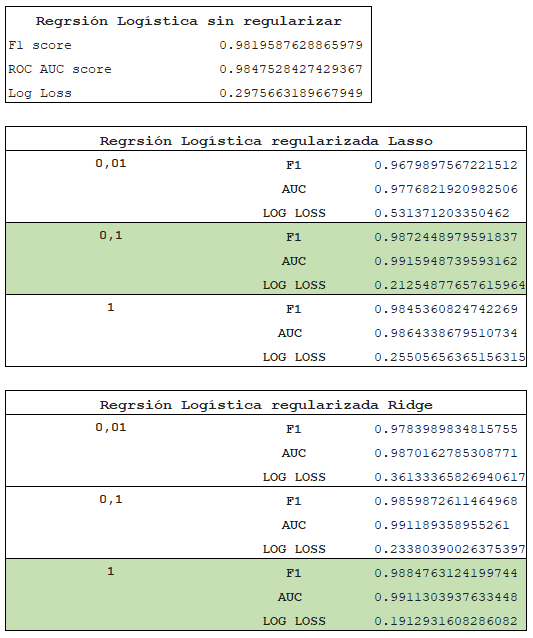

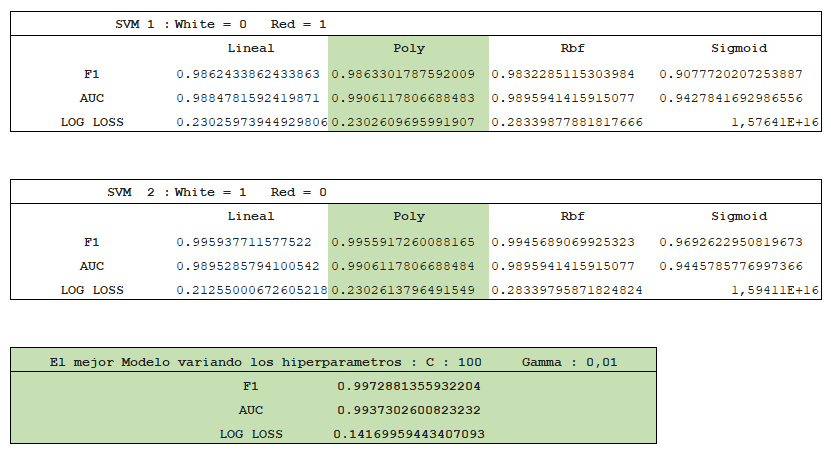

Dentro de los mejores modelos, y siendo muy estrictos el modelo escogido y con mejor rendimiento es el SVM con la variable recategorizada:

    White = 1 
    Red = 0 

Con un Kernel = 'Poly', 

Hiperparametros C = 100 y Gamma = 0.01

